In [1]:
import pyam
import pandas as pd
import nomenclature
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [28]:
df = pd.read_excel('data/GEO7_FOD_results.xlsx', sheet_name='data')
# until 2050
df = df[['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050']]
df

,Model,Scenario,Region,Variable,Unit,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,IMAGE 3.3,LIFE-TP,Africa (UN-R5),Agricultural Demand,million t DM/yr,421.076129,488.757398,552.659523,622.599414,695.450176,815.475719,1374.956355,1877.400082,2097.145465
1,IMAGE 3.3,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy,million t DM/yr,3.022935,8.107065,9.120188,20.039323,29.254952,72.963684,556.594769,993.819725,1148.080659
2,IMAGE 3.3,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy|Crops,million t DM/yr,3.022935,8.107065,9.120188,20.039323,29.254952,72.963684,556.594769,993.819725,1148.080659
3,IMAGE 3.3,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy|Crops|1st generation,million t DM/yr,3.022935,8.107065,9.120188,3.146959,2.949206,3.196734,13.290263,15.811367,13.543890
4,IMAGE 3.3,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy|Crops|2nd generation,million t DM/yr,0.000000,0.000000,0.000000,16.892364,26.305745,69.766952,543.304492,978.008369,1134.536791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246,JRC-FASST 1.0.0,REF,World,Concentration|PM2.5,µg/m3,NaN,34.585931,34.006688,35.148099,35.371155,NaN,NaN,32.979457,32.402158
3247,JRC-FASST 1.0.0,TECH-TP,World,Concentration|PM2.5,µg/m3,NaN,34.530652,33.806212,29.448617,29.212242,NaN,NaN,27.588576,30.605810
3248,JRC-FASST 1.0.0,LIFE-TP,World,Population|Exposure to Ambient PM2.5 > 25 μg/m3,%,NaN,59.858591,59.573252,52.696135,49.210350,NaN,NaN,50.025408,50.397561
3249,JRC-FASST 1.0.0,REF,World,Population|Exposure to Ambient PM2.5 > 25 μg/m3,%,NaN,59.941379,59.764277,61.189189,61.763281,NaN,NaN,57.769602,56.295155


In [29]:
compare_dict = {
    "Land Cover|Cropland": "Land Cover Cropland", 
    "Land Cover|Pasture": "Land Cover Pasture",
    "Land Cover|Forest": "Forest Area",
    "Primary Energy": "Total Primary Energy",
    "Terrestrial Biodiversity|MSA":"Mean Species Abundance",
    'Emissions|Kyoto Gases': "Greenhouse Gas Emissions",
    'Population|Exposure to Ambient PM2.5 > 25 μg/m3': "Population exposed to ambient PM2.5 > 25 μg/m^3",
}
path_dict = {
    "Land Cover|Cropland": "Systems/Food", 
    "Land Cover|Pasture": "Systems/Food",
    "Land Cover|Forest": "Systems/Environment",
    "Primary Energy": "Systems/Energy",
    "Terrestrial Biodiversity|MSA":"Goals/Biodiversity_Loss",
    'Emissions|Kyoto Gases': "Goals/Climate_Change",
    'Population|Exposure to Ambient PM2.5 > 25 μg/m3': "Goals/Pollution",
}

# df_world = df[df['Region'] == 'World']
df_selected = df[df['Variable'].isin(list(compare_dict.keys()))]

df_compare_data = pd.melt(df_selected, id_vars=['Model',
                              'Scenario',
                              'Region',
                              'Variable',
                              'Unit'
                                ], var_name='Year', value_name='Value')
df_compare_data['Year'] = df_compare_data['Year'].astype(int)

variables = df_compare_data.Variable.unique()
# Define the color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

for variable in variables:
    df_var = df_compare_data[df_compare_data["Variable"] == variable]
    # Get unique regions for creating subplots
    unique_regions = df_var['Region'].unique()

    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Iterate through each region and plot in respective subplot
    for idx, region in enumerate(unique_regions):
        row_idx = idx // 3
        col_idx = idx % 3
        
        ax = axes[row_idx, col_idx]  # Select the current subplot
        
        region_data = df_var[df_var['Region'] == region]  # Filter data for the current region
        
        # Plot lineplots for each region
        lineplot = sns.lineplot(data=region_data, x="Year", y="Value", hue="Scenario", palette=scenario_colors, 
                    linewidth=2.5, ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_ylabel(region_data["Unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
        # Set y-axis lower limit to 0
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_xlabel('', fontsize=1)
        ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
        ax.set_xticks([2010, 2020, 2030, 2040, 2050])
        ax.set_xticklabels([2010, 2020, 2030, 2040, 2050], 
                        rotation=45, fontsize=14)
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)

        # Add the lineplot to the legend manually
        legend_handles.append(lineplot)
        legend_labels.append(region)
        # Disable the legend for individual subplots
        ax.legend().set_visible(False)
        ax.grid(True)

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')

    # Show legend and grid for the current subplot
    fig.suptitle(f"{compare_dict[variable]}", fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.1, 0.55))
    plt.tight_layout()  # Adjust subplots to prevent overlap
    
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/Regional/{path_dict[variable]}/{variable_name[:34]}.png", bbox_inches='tight')
    plt.close()

# Calculate new variables

In [30]:
pyam_df = pyam.IamDataFrame(data=df)
# Create new variables
# (Primary Energy|Biomass + Primary Energy|Hydro + Primary Energy|Solar + Primary Energy|Wind + Primary Energy|Other) / Primary Energy
# Agricultural Demand|Non-Energy|Crops|Food / (Agricultural Demand|Non-Energy|Crops|Food + Agricultural Demand|Non-Energy|Livestock|Food)
pyam_df.aggregate("Primary Energy|Renewables", 
                       components=['Primary Energy|Biomass', 
                                    'Primary Energy|Hydro', 
                                    'Primary Energy|Solar', 
                                    'Primary Energy|Wind',
                                    'Primary Energy|Other'], 
                        append=True)

pyam_df.aggregate("Agricultural Demand|Non-Energy|Crops & Livestock|Food", 
                       components=['Agricultural Demand|Non-Energy|Crops|Food', 
                                    'Agricultural Demand|Non-Energy|Livestock|Food',
                                    ], 
                        append=True)

pyam_df.divide("Primary Energy|Renewables", 
               "Primary Energy", 
               "Primary Energy|Renewables (Fraction)", 
               ignore_units=True, 
               append=True)

pyam_df.multiply("Primary Energy|Renewables (Fraction)", 
               100, 
               "Primary Energy|Renewables (Share)", 
               ignore_units='%', 
               append=True)


pyam_df.divide("Agricultural Demand|Non-Energy|Crops|Food", 
               "Agricultural Demand|Non-Energy|Crops & Livestock|Food", 
               "Agricultural Demand|Non-Energy|Crops|Food (Fraction)", 
               ignore_units=True, 
               append=True)

pyam_df.multiply("Agricultural Demand|Non-Energy|Crops|Food (Fraction)", 
               100, 
               "Agricultural Demand|Non-Energy|Crops|Food (Share)", 
               ignore_units='%', 
               append=True)

In [31]:
compare_dict = {"Primary Energy|Renewables (Share)":"Share of renewables in total primary energy", 
            "Agricultural Demand|Non-Energy|Crops|Food (Share)":" Share of crops in total agricultural demand"}

path_dict = {"Primary Energy|Renewables (Share)":"Systems/Energy", 
            "Agricultural Demand|Non-Energy|Crops|Food (Share)":"Systems/Food"}

df_solid = pyam_df.filter(variable=["Primary Energy|Renewables (Share)", 
                                    "Agricultural Demand|Non-Energy|Crops|Food (Share)"],
                          year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]
                          )
df_solid = df_solid.data
variables = df_solid.variable.unique()
# Define the color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}



for variable in variables:
    df_var = df_solid[df_solid["variable"] == variable]
    # Get unique regions for creating subplots
    unique_regions = df_var['region'].unique()

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Iterate through each region and plot in respective subplot
    for idx, region in enumerate(unique_regions):
        row_idx = idx // 3
        col_idx = idx % 3
        
        ax = axes[row_idx, col_idx]  # Select the current subplot
        
        region_data = df_var[df_var['region'] == region]  # Filter data for the current region
        
        # Plot lineplots for each region
        lineplot = sns.lineplot(data=region_data, x="year", y="value", hue="scenario", palette=scenario_colors, 
                    linewidth=2.5, ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
        # Set y-axis lower limit to 0
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_xlabel('', fontsize=1)
        ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
        ax.set_xticks([2010, 2020, 2030, 2040, 2050,])
        ax.set_xticklabels([2010, 2020, 2030, 2040, 2050,], 
                        rotation=45, fontsize=14)
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)

        # Add the lineplot to the legend manually
        legend_handles.append(lineplot)
        legend_labels.append(region)
        # Disable the legend for individual subplots
        ax.legend().set_visible(False)
        ax.grid(True)

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')
    
    # Show legend and grid for the current subplot
    fig.suptitle(f"{compare_dict[variable]}", fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.1, 0.55))
    plt.tight_layout()  # Adjust subplots to prevent overlap
    
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/Regional/{path_dict[variable]}/{variable_name}.png", bbox_inches='tight')
    plt.close()

# Get data from database

In [33]:
# AIM has not submitted, use IMAGE
# (Land Cover|Forest + Land Cover|Other Land) / (Land Cover)
# Population|Electricity Access / Population
# Population relying on solid fuels / Population

df_calc = pyam.read_iiasa(
    'geo7_internal',
    variable=['Population|Relying on Solid Fuels',
              'Land Cover|Forest',
              'Land Cover|Other Land',
              'Land Cover',
              'Population|Electricity Access',
              'Population',
              'Production|Non-Metallic Minerals|Cement',],
    region=['Africa (UN-R5)', 'Asia and the Pacific (UN-R5)', 'Eastern Europe (UN-R5)',
       'Latin America and Caribbean (UN-R5)', 'Western Europe and Other States (UN-R5)','World'],
    model='IMAGE 3.3',
)

# Create new variables
df_calc.aggregate("Land Cover|Forest & Other Land", 
                    components=['Land Cover|Forest', 
                                'Land Cover|Other Land',], 
                    append=True)

df_calc.divide("Population|Relying on Solid Fuels", 
               "Population", 
               "Population|Relying on Solid Fuels (Fraction)", 
               ignore_units=True, 
               append=True)
df_calc.multiply("Population|Relying on Solid Fuels (Fraction)", 
               100, 
               "Population|Relying on Solid Fuels (Share)", 
               ignore_units='%', 
               append=True)

df_calc.divide("Population|Electricity Access", 
               "Population", 
               "Population|Electricity Access (Fraction)", 
               ignore_units=True, 
               append=True)
df_calc.multiply("Population|Electricity Access (Fraction)", 
               100, 
               "Population|Electricity Access (Share)", 
               ignore_units='%', 
               append=True)

df_calc.divide("Land Cover|Forest & Other Land", 
               "Land Cover", 
               "Land Cover|Forest & Other Land (Fraction)", 
               ignore_units='%', 
               append=True)
df_calc.multiply("Land Cover|Forest & Other Land (Fraction)", 
               100, 
               "Land Cover|Forest & Other Land (Share)", 
               ignore_units='%', 
               append=True)

ixmp4.conf.settings - INFO: Connecting as user 'LaszloVreedenburgh'.
2024-01-23 13:37:25 INFO     Connecting as user 'LaszloVreedenburgh'.
pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-23 13:37:26 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-23 13:37:26 INFO     You are connected as user `LaszloVreedenburgh`


In [34]:
compare_dict = {"Land Cover|Forest & Other Land (Share)": "Share of forest and other natural land", 
                "Population|Electricity Access (Share)": "Electricity Access",
                "Population|Relying on Solid Fuels (Share)": "Population relying on solid fuels",
                'Production|Non-Metallic Minerals|Cement': "Production of cement"}

path_dict = {"Land Cover|Forest & Other Land (Share)": "Goals/Land_Degradation", 
             "Population|Electricity Access (Share)": "Goals/Energy_Access",
             "Population|Relying on Solid Fuels (Share)": "Goals/Energy_Access",
                'Production|Non-Metallic Minerals|Cement': "Systems/Circularity"}

df_calc_filtered = df_calc.filter(scenario=['LIFE-TP', 'REF', 'TECH-TP'],
                         variable=["Land Cover|Forest & Other Land (Share)",
                                   "Population|Electricity Access (Share)",
                                   "Population|Relying on Solid Fuels (Share)",
                                   'Production|Non-Metallic Minerals|Cement'],
                         year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]
                         )
df_calc_data = df_calc_filtered.data
variables = df_calc_data.variable.unique()
# Define the color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

for variable in variables:
    df_var = df_calc_data[df_calc_data["variable"] == variable]
    # Get unique regions for creating subplots
    unique_regions = df_var['region'].unique()

    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Iterate through each region and plot in respective subplot
    for idx, region in enumerate(unique_regions):
        row_idx = idx // 3
        col_idx = idx % 3
        
        ax = axes[row_idx, col_idx]  # Select the current subplot
        
        region_data = df_var[df_var['region'] == region]  # Filter data for the current region
        
        # Plot lineplots for each region
        lineplot = sns.lineplot(data=region_data, x="year", y="value", hue="scenario", palette=scenario_colors, 
                    linewidth=2.5, ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
        # Set y-axis lower limit to 0
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_xlabel('', fontsize=1)
        ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
        ax.set_xticks([2010, 2020, 2030, 2040, 2050,])
        ax.set_xticklabels([2010, 2020, 2030, 2040, 2050,], 
                        rotation=45, fontsize=14)
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)

        # Add the lineplot to the legend manually
        legend_handles.append(lineplot)
        legend_labels.append(region)
        # Disable the legend for individual subplots
        ax.legend().set_visible(False)
        ax.grid(True)

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')
    
    # Show legend and grid for the current subplot
    fig.suptitle(f"{compare_dict[variable]}", fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.1, 0.55))
    plt.tight_layout()  # Adjust subplots to prevent overlap
    
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/Regional/{path_dict[variable]}/{variable_name}.png", bbox_inches='tight')
    plt.close()

# Well Being

In [35]:
df_hunger = pyam.read_iiasa(
    'geo7_internal',
    variable=['Population|Risk of Hunger', 'Population|Extreme Poverty|International Poverty Line'],
    region=['Africa (UNEP-R5)', 'Asia and the Pacific (UNEP-R5)', 'Eastern Europe (UNEP-R5)',
       'Latin America and Caribbean (UNEP-R5)', 'Western Europe and Other States (UNEP-R5)','World',
       'Africa (UN-R5)', 'Asia and the Pacific (UN-R5)', 'Eastern Europe (UN-R5)',
       'Latin America and Caribbean (UN-R5)', 'Western Europe and Other States (UN-R5)'],
    model=['AIM/Hub-Global 2.4', 'IMAGE 3.3']
)

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-23 13:38:26 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-23 13:38:26 INFO     You are connected as user `LaszloVreedenburgh`


In [37]:
compare_dict = {"Population|Risk of Hunger": "Population at risk of hunger", 
                'Population|Extreme Poverty|International Poverty Line':'Population|Extreme Poverty|International Poverty Line' }

path_dict = {"Population|Risk of Hunger": "Goals/Food_Security",
             'Population|Extreme Poverty|International Poverty Line':'Other/Population'
             }

df_hunger = df_hunger.filter(scenario=['LIFE-TP', 'REF', 'TECH-TP'],
                             year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_hunger_data = df_hunger.data
df_hunger_data['region'] = df_hunger_data['region'].replace({'Africa (UNEP-R5)':'Africa (UN-R5)', 
                                                            'Asia and the Pacific (UNEP-R5)':'Asia and the Pacific (UN-R5)',
                                                            'Eastern Europe (UNEP-R5)':'Eastern Europe (UN-R5)',
                                                            'Latin America and Caribbean (UNEP-R5)':'Latin America and Caribbean (UN-R5)',
                                                            'Western Europe and Other States (UNEP-R5)':'Western Europe and Other States (UN-R5)'})

# Condition to identify rows to be removed
condition_image = (df_hunger_data['model'] == 'IMAGE 3.3') & (df_hunger_data['scenario'] == 'REF')

# Remove multiple scenarios for aim
aim_scen_to_remove = ['TECH-TP', 'LIFE-TP']
condition_aim = (df_hunger_data['model'] == 'AIM/Hub-Global 2.4') & (df_hunger_data['scenario'].isin(aim_scen_to_remove))

# Remove rows based on the condition
df_hunger_data = df_hunger_data[~condition_image]
df_hunger_data = df_hunger_data[~condition_aim]

df_hunger_data = df_hunger_data.reset_index(drop=True)
df_hunger_data = df_hunger_data.sort_values('region')
variables = df_hunger_data.variable.unique()

# Define the color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

for variable in variables:
    df_var = df_hunger_data[df_hunger_data["variable"] == variable]
    # Get unique regions for creating subplots
    unique_regions = df_var['region'].unique()

    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Iterate through each region and plot in respective subplot
    for idx, region in enumerate(unique_regions):
        row_idx = idx // 3
        col_idx = idx % 3
        
        ax = axes[row_idx, col_idx]  # Select the current subplot
        
        region_data = df_var[df_var['region'] == region]  # Filter data for the current region
        
        # Plot lineplots for each region
        lineplot = sns.lineplot(data=region_data, x="year", y="value", hue="scenario", palette=scenario_colors, 
                    linewidth=2.5, ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
        ax.set_xlabel('', fontsize=1)
        # Set y-axis lower limit to 0
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
        ax.set_xticks([2010, 2020, 2030, 2040, 2050,])
        ax.set_xticklabels([2010, 2020, 2030, 2040, 2050,], 
                        rotation=45, fontsize=14)
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)

        # Add the lineplot to the legend manually
        legend_handles.append(lineplot)
        legend_labels.append(region)
        # Disable the legend for individual subplots
        ax.legend().set_visible(False)
        ax.grid(True)

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')
    
    # Show legend and grid for the current subplot
    fig.suptitle(f"{compare_dict[variable]}", fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.1, 0.55))
    plt.tight_layout()  # Adjust subplots to prevent overlap

    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"./plots/Regional/{path_dict[variable]}/{variable_name[:34]}.png", bbox_inches='tight')
    plt.close()

C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_2376\1222528200.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hunger_data = df_hunger_data[~condition_aim]


In [17]:
ipcc_scenarios = ["CD-LINKS_NPi2020_400", "EN_NPi2020_300f", "EN_NPi2020_600", "1.5C", "Ratchet-1.5-limCDR-noOS", "Ratchet-1.5-noCDR", "Ratchet-1.5-noCDR-noOS", "EN_NPi2020_400", "SSP1-19", "R_MAC_30_n0", "R_MAC_35_n8", "R_MAC_40_n8", "R_MAC_45_n8", "R_MAC_50_n8", "EN_NPi2020_500", "EN_NPi2020_600_COV", "SSP1_SPA1_19I_D_LB", "SSP1_SPA1_19I_LIRE_LB", "SSP1_SPA1_19I_RE_LB", "SSP2_SPA1_19I_D_LB", "SSP2_SPA1_19I_LIRE_LB", "SSP2_SPA1_19I_RE_LB", "SSP2_SPA2_19I_LI", "ADVANCE_2020_1.5C-2100", "EMF33_1.5C_cost100", "EMF33_1.5C_full", "SSP2-19", "CD-LINKS_NPi2020_400", "LowEnergyDemand_1.3_IPCC", "EN_NPi2020_450", "EN_NPi2020_500", "EN_NPi2020_600_COV", "EN_NPi2020_600_DR1p", "EN_NPi2020_600_DR2p", "EN_NPi2020_600_DR3p", "EN_NPi2020_600_DR4p", "NGFS2_Divergent Net Zero Policies", "NGFS2_Net-Zero 2050", "COV_GreenPush_550", "COV_NoPolicyNoCOVID_550", "COV_Restore_550", "COV_SelfReliance_550", "COV_SmartUse_550", "ADVANCE_2020_1.5C-2100", "EMF33_WB2C_cost100", "EMF33_WB2C_full", "EMF33_WB2C_nofuel", "ADVANCE_2020_1.5C-2100", "CEMICS-1.5-CDR12", "CEMICS-1.5-CDR20", "CEMICS-1.5-CDR8", "CEMICS-2.0-CDR8", "CEMICS_GDPgrowth_1p5", "CEMICS_HotellingConst_1p5", "CEMICS_Linear_1p5", "CEMICS_opt_1p5", "LeastTotalCost_LTC_brkLR15_SSP1_P50", "R2p1_SSP1-PkBudg900", "R2p1_SSP2-PkBudg900", "R2p1_SSP5-PkBudg900", "SSP2-19", "CD-LINKS_NPi2020_400", "EMF33_1.5C_nofuel", "PEP_1p5C_full_eff", "PEP_1p5C_red_eff", "PEP_2C_red_eff", "SMP_2C_lifesty", "CEMICS_SSP1-1p5C-fullCDR", "CEMICS_SSP1-1p5C-minCDR", "CEMICS_SSP2-1p5C-fullCDR", "CEMICS_SSP2-1p5C-minCDR", "EN_NPi2020_200f", "EN_NPi2020_300f", "EN_NPi2020_400", "EN_NPi2020_400f", "EN_NPi2020_500", "EN_NPi2020_600", "EN_NPi2020_600_COV", "EN_NPi2020_600f_COV", "NGFS2_Divergent Net Zero Policies", "NGFS2_Net-Zero 2050", "NGFS2_Net-Zero 2050 - IPD-95th", "NGFS2_Net-Zero 2050 - IPD-median", "SusDev_SDP-PkBudg1000", "SusDev_SSP1-PkBudg900", "SusDev_SSP2-PkBudg900", "DeepElec_SSP2_ HighRE_Budg900", "DeepElec_SSP2_def_Budg900", "EN_NPi2020_400f", "EN_NPi2020_450", "EN_NPi2020_450f", "EN_NPi2020_500", "EN_NPi2020_500f", "SSP1-19", "SSP4-19", "CD-LINKS_NPi2020_1000", "CD-LINKS_NPi2020_400"]

hunger_scenarios = [['CD-LINKS_INDCi',
 'CD-LINKS_NPi',
 'CD-LINKS_NPi2020_1000',
 'CD-LINKS_NPi2020_400',
 'CO_2Deg2020',
 'CO_2Deg2030',
 'CO_BAU',
 'CO_Bridge',
 'CO_CurPol',
 'CO_GPP',
 'CO_NDCplus',
 'EN_INDCi2030_1000f',
 'EN_INDCi2030_1200',
 'EN_INDCi2030_1200f',
 'EN_INDCi2030_1400',
 'EN_INDCi2030_1400f',
 'EN_INDCi2030_1600',
 'EN_INDCi2030_1600f',
 'EN_INDCi2030_1800',
 'EN_INDCi2030_1800f',
 'EN_INDCi2030_800f',
 'EN_INDCi2030_900f',
 'EN_INDCi2100',
 'EN_NPi2020_1000',
 'EN_NPi2020_1000f',
 'EN_NPi2020_1200',
 'EN_NPi2020_1200f',
 'EN_NPi2020_1400',
 'EN_NPi2020_1400f',
 'EN_NPi2020_1600',
 'EN_NPi2020_1600f',
 'EN_NPi2020_1800',
 'EN_NPi2020_1800f',
 'EN_NPi2020_300f',
 'EN_NPi2020_400f',
 'EN_NPi2020_500f',
 'EN_NPi2020_600',
 'EN_NPi2020_600f',
 'EN_NPi2020_700',
 'EN_NPi2020_700f',
 'EN_NPi2020_800',
 'EN_NPi2020_800f',
 'EN_NPi2020_900',
 'EN_NPi2020_900f',
 'EN_NPi2100',
 '1.5C',
 '2.5C',
 '2C',
 'Baseline',
 'WB2C',
 'CEMICS_SSP1-1p5C-fullCDR',
 'CEMICS_SSP1-1p5C-minCDR',
 'CEMICS_SSP1-Npi',
 'CEMICS_SSP2-1p5C-fullCDR',
 'CEMICS_SSP2-1p5C-minCDR',
 'CEMICS_SSP2-2C-fullCDR',
 'CEMICS_SSP2-2C-minCDR',
 'CEMICS_SSP2-Npi',
 'EN_INDCi2030_1000',
 'EN_INDCi2030_1000_COV',
 'EN_INDCi2030_1000_COV_NDCp',
 'EN_INDCi2030_1000_NDCp',
 'EN_INDCi2030_1000f_COV',
 'EN_INDCi2030_1000f_COV_NDCp',
 'EN_INDCi2030_1000f_NDCp',
 'EN_INDCi2030_2000',
 'EN_INDCi2030_2000f',
 'EN_INDCi2030_2500',
 'EN_INDCi2030_2500f',
 'EN_INDCi2030_3000',
 'EN_INDCi2030_3000f',
 'EN_INDCi2030_300f',
 'EN_INDCi2030_400f',
 'EN_INDCi2030_500f',
 'EN_INDCi2030_600_COV',
 'EN_INDCi2030_600_COV_NDCp',
 'EN_INDCi2030_600f',
 'EN_INDCi2030_600f_COV',
 'EN_INDCi2030_600f_COV_NDCp',
 'EN_INDCi2030_600f_NDCp',
 'EN_INDCi2030_700',
 'EN_INDCi2030_700f',
 'EN_INDCi2030_800',
 'EN_INDCi2030_900',
 'EN_INDCi2100_COV',
 'EN_INDCi2100_COV_NDCp',
 'EN_INDCi2100_NDCp',
 'EN_NPi2020_1000_COV',
 'EN_NPi2020_1000f_COV',
 'EN_NPi2020_2000',
 'EN_NPi2020_2000f',
 'EN_NPi2020_200f',
 'EN_NPi2020_2500',
 'EN_NPi2020_2500f',
 'EN_NPi2020_3000',
 'EN_NPi2020_3000f',
 'EN_NPi2020_400',
 'EN_NPi2020_500',
 'EN_NPi2020_600_COV',
 'EN_NPi2020_600f_COV',
 'EN_NPi2100_COV',
 'EN_NoPolicy',
 'SusDev_SDP-NPi',
 'SusDev_SDP-PkBudg1000',
 'SusDev_SSP1-NDC',
 'SusDev_SSP1-NPi',
 'SusDev_SSP1-PkBudg900',
 'SusDev_SSP2-NDC',
 'SusDev_SSP2-NPi',
 'SusDev_SSP2-PkBudg900',
 'DeepElec_SSP2_ HighRE_Budg1100',
 'DeepElec_SSP2_ HighRE_Budg1300',
 'DeepElec_SSP2_ HighRE_Budg900',
 'DeepElec_SSP2_Base',
 'DeepElec_SSP2_Npi',
 'DeepElec_SSP2_def_Budg1100',
 'DeepElec_SSP2_def_Budg1300',
 'DeepElec_SSP2_def_Budg900']]



df_hunger_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Population|Risk of Hunger', 
            ],
    region='World',
    # scenario=ipcc_scenarios,
    # scenario=[
    #     'EN_NPi2020_200f',
    #     'EN_NPi2020_400',
    #     'EN_NPi2020_500',
    #     'EN_NPi2020_600_COV',
    #     'EN_NPi2020_600f_COV',],
    scenario=hunger_scenarios,
    
)

df_hunger_ar6.scenario
df_hunger_ar6 = df_hunger_ar6.filter(year=[2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])

pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
2024-01-23 11:43:37 INFO     You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-23 11:43:37 INFO     You are connected as user `LaszloVreedenburgh`


<Axes: xlabel='year', ylabel='value'>

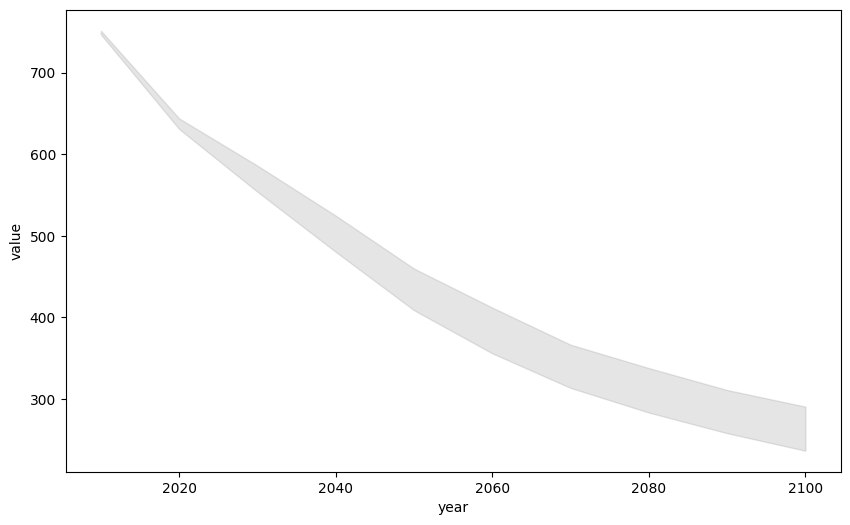

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
df_ar6_data = df_hunger_ar6.data
sns.lineplot(
        data=df_ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey'
    )